In [1]:
#Function to translate non english pdf to english using google translate api
#Note, google_trans_new library has error, need to Change the line 151 in google_trans_new/google_trans_new.py which is:
#response = (decoded_line + ']') to response = decoded_line
from langdetect import detect
from google_trans_new import google_translator  

#simple function to detect and translate text to english
def detect_and_translate(text,target_lang='en'):
    
    #try for lang detect error, this is not the best as errors usually occur when string is empty
    #Which happens with the pdf extractor, to be improved in the future
    try:
        detect(text)
    except:
        result_lang = 'en'
    else:
        result_lang = detect(text)
                
    if result_lang == target_lang:
        return text 
    
    else:
        translator = google_translator()
        translate_text = translator.translate(text,lang_src=result_lang,lang_tgt=target_lang)
        return translate_text 

In [9]:
#Setting all the Text catergory into a list
# types = ['Addendums', 'Endorsements', 'FinancialReports', 'NDA', 'Payslips', 'RandomPDFs']
# file_count = []

#Doing conversion one by one due to time out on my computer
types = ['NDA']

#PDF to text using PDF Plumber, then detect&translate to English and save back to txt file in same folder
import pdfplumber
import os

path_ = "c:/users/hipwo/DS Indiv Assignment/"

for each in types:
    path_to_your_files = path_ + each
    count = 0
    
    for filename in os.listdir(path_to_your_files):
#         if filename.endswith('.pdf'):
        absolute_file_path = os.path.join(path_to_your_files, filename)
        with pdfplumber.open(absolute_file_path) as pdf:
            for page in pdf.pages:
                text = page.extract_text()
                text = detect_and_translate(text)
                with open(
                        os.path.splitext(absolute_file_path)[0] + ".txt", encoding="utf-8", mode="a"
                ) as f:
                    f.write(text)
        count += 1
        print(count, "file converted! This is hard work man!")
#     file_count.append(count)
    print("Total", count, "files done! I need a break!!")

1 file converted! This is hard work man!
2 file converted! This is hard work man!
3 file converted! This is hard work man!
4 file converted! This is hard work man!
5 file converted! This is hard work man!
6 file converted! This is hard work man!
7 file converted! This is hard work man!
8 file converted! This is hard work man!
9 file converted! This is hard work man!
10 file converted! This is hard work man!
11 file converted! This is hard work man!
12 file converted! This is hard work man!
13 file converted! This is hard work man!
14 file converted! This is hard work man!
15 file converted! This is hard work man!
16 file converted! This is hard work man!
17 file converted! This is hard work man!
18 file converted! This is hard work man!
19 file converted! This is hard work man!
20 file converted! This is hard work man!
21 file converted! This is hard work man!
22 file converted! This is hard work man!
23 file converted! This is hard work man!
24 file converted! This is hard work man!
2

195 file converted! This is hard work man!
196 file converted! This is hard work man!
197 file converted! This is hard work man!
198 file converted! This is hard work man!
199 file converted! This is hard work man!
200 file converted! This is hard work man!
201 file converted! This is hard work man!
202 file converted! This is hard work man!
203 file converted! This is hard work man!
204 file converted! This is hard work man!
205 file converted! This is hard work man!
206 file converted! This is hard work man!
207 file converted! This is hard work man!
208 file converted! This is hard work man!
209 file converted! This is hard work man!
210 file converted! This is hard work man!
211 file converted! This is hard work man!
212 file converted! This is hard work man!
213 file converted! This is hard work man!
214 file converted! This is hard work man!
215 file converted! This is hard work man!
216 file converted! This is hard work man!
217 file converted! This is hard work man!
218 file co

386 file converted! This is hard work man!
387 file converted! This is hard work man!
388 file converted! This is hard work man!
389 file converted! This is hard work man!
390 file converted! This is hard work man!
391 file converted! This is hard work man!
392 file converted! This is hard work man!
393 file converted! This is hard work man!
394 file converted! This is hard work man!
395 file converted! This is hard work man!
396 file converted! This is hard work man!
397 file converted! This is hard work man!
398 file converted! This is hard work man!
399 file converted! This is hard work man!
400 file converted! This is hard work man!
401 file converted! This is hard work man!
402 file converted! This is hard work man!
403 file converted! This is hard work man!
404 file converted! This is hard work man!
405 file converted! This is hard work man!
406 file converted! This is hard work man!
407 file converted! This is hard work man!
408 file converted! This is hard work man!
409 file co

577 file converted! This is hard work man!
578 file converted! This is hard work man!
579 file converted! This is hard work man!
580 file converted! This is hard work man!
581 file converted! This is hard work man!
582 file converted! This is hard work man!
583 file converted! This is hard work man!
584 file converted! This is hard work man!
585 file converted! This is hard work man!
586 file converted! This is hard work man!
587 file converted! This is hard work man!
588 file converted! This is hard work man!
589 file converted! This is hard work man!
590 file converted! This is hard work man!
591 file converted! This is hard work man!
592 file converted! This is hard work man!
593 file converted! This is hard work man!
594 file converted! This is hard work man!
595 file converted! This is hard work man!
596 file converted! This is hard work man!
597 file converted! This is hard work man!
598 file converted! This is hard work man!
599 file converted! This is hard work man!
600 file co

In [10]:
#Note to self: Next time pypdf to convert pdf to text, pywin32 to convert word to text

In [1]:
#Prepare the corpus using NLTK library to read all text files
import nltk
from nltk.corpus import PlaintextCorpusReader
import timeit

addendum = PlaintextCorpusReader('Documents/Addendums', '.+\.txt')
endorsement = PlaintextCorpusReader('Documents/Endorsements', '.+\.txt')
financialreport = PlaintextCorpusReader('Documents/FinancialReports', '.+\.txt')
nda = PlaintextCorpusReader('Documents/NDA', '.+\.txt')
payslip = PlaintextCorpusReader('Documents/Payslips', '.+\.txt')
randompdf = PlaintextCorpusReader('Documents/RandomPDFs', '.+\.txt')

add_docs = [addendum.words(fid) for fid in addendum.fileids()]
end_docs = [endorsement.words(fid) for fid in endorsement.fileids()]
fin_docs = [financialreport.words(fid) for fid in financialreport.fileids()]
nda_docs = [nda.words(fid) for fid in nda.fileids()]
pay_docs = [payslip.words(fid) for fid in payslip.fileids()]
ran_docs = [randompdf.words(fid) for fid in randompdf.fileids()]

#Checking data
print(add_docs[0:2][0:5])
print(nda_docs[0:2][0:5])

[['Addendum', 'No', '.', '2', 'Date', ':', 'April', ...], ['PROMULGATED', 'BY', 'THE', 'TEXAS', 'REAL', 'ESTATE', ...]]
[['EX', '-', '99', '.(', 'D', ')(', '8', ')', '8', ...], ['EX', '-', '10', '.', '23', '5', 'dex1023', '.', ...]]


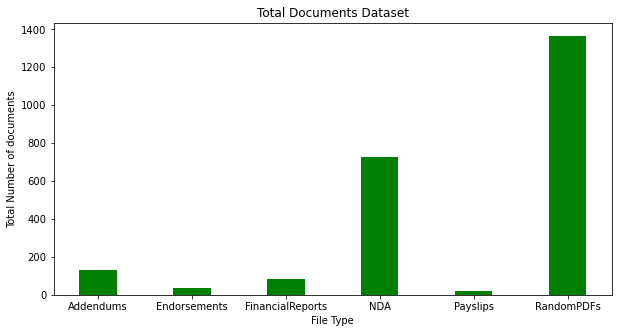

In [2]:
#checking overall data
types = ['Addendums', 'Endorsements', 'FinancialReports', 'NDA', 'Payslips', 'RandomPDFs']
file_count=[]
num_add = len(add_docs)
num_end = len(end_docs)
num_fin = len(fin_docs)
num_nda = len(nda_docs)
num_pay = len(pay_docs)
num_ran = len(ran_docs)
file_count.append(num_add)
file_count.append(num_end)
file_count.append(num_fin)
file_count.append(num_nda)
file_count.append(num_pay)
file_count.append(num_ran)

#Plotting number of text files in each catergory to work with
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
plt.bar(types, file_count, color ='green',
        width = 0.4)
 
plt.xlabel("File Type")
plt.ylabel("Total Number of documents")
plt.title("Total Documents Dataset")
plt.show()
#Results show alot of documents under others and NDA, might affect accuracy later on

In [3]:
#Split Train and Test set
train_amount = 0.7

train_len_add = round(num_add * train_amount)
add_docs1 = add_docs[:train_len_add]
add_test1 = add_docs[train_len_add:]

train_len_end = round(num_end * train_amount)
end_docs1 = end_docs[:train_len_end]
end_test1 = end_docs[train_len_end:]

train_len_fin = round(num_fin * train_amount)
fin_docs1 = fin_docs[:train_len_fin]
fin_test1 = fin_docs[train_len_fin:]

train_len_nda = round(num_nda * train_amount)
nda_docs1 = nda_docs[:train_len_nda]
nda_test1 = nda_docs[train_len_nda:]

train_len_pay = round(num_pay * train_amount)
pay_docs1 = pay_docs[:train_len_pay]
pay_test1 = pay_docs[train_len_pay:]

train_len_ran = round(num_ran * train_amount)
ran_docs1 = ran_docs[:train_len_ran]
ran_test1 = ran_docs[train_len_ran:]

print(add_docs1[-1][0:5])
print(add_test1[0][0:5])

['Agreement', 'No', '.', 'EQUIPMENT', 'FINANCING']
['This', 'attachment', 'is', 'intended', 'to']


In [4]:
#Function to Pre Proccess Text
import re
import gensim
from gensim.parsing.porter import PorterStemmer

stemmer = PorterStemmer()
stop_list = gensim.parsing.preprocessing.STOPWORDS

def preprocess(docs):
    #To lower case all letters
    docs1 = [[w.lower() for w in d] for d in docs]
    #Remove punctuation and only keep words
    docs2 = [[w for w in d if re.search('^[a-z]+$',w)] for d in docs1]
    #Remove Stopwords
    docs3 = [[w for w in d if w not in stop_list] for d in docs2]
    #Stemming of words
    docs4 = [[stemmer.stem(w) for w in d] for d in docs3]
    return docs4

In [5]:
#Add all training documents for preprocessing
all_docs1 = add_docs1 + end_docs1 + fin_docs1 + nda_docs1 + pay_docs1 + ran_docs1
print(len(all_docs1))

all_docs2 = preprocess(all_docs1)

1651


In [6]:
#Geting train doc count for each catergory
num_train_add = len(add_docs1)
num_train_end = len(end_docs1)
num_train_fin = len(fin_docs1)
num_train_nda = len(nda_docs1)
num_train_pay = len(pay_docs1)
num_train_ran = len(ran_docs1)

#Create dictionary from all documents
from gensim import corpora
dictionary = corpora.Dictionary(all_docs2)
print(dictionary)

# Convert all to TF Vectors using doc2bow()
all_tf_vectors = [dictionary.doc2bow(d) for d in all_docs2]

# Display the vector form of first document
print(all_tf_vectors[0])

Dictionary(565929 unique tokens: ['acknowledg', 'addenda', 'addendum', 'april', 'attach']...)
[(0, 1), (1, 1), (2, 6), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 4), (23, 2), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 5), (39, 3), (40, 3), (41, 3), (42, 4), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 4), (50, 1), (51, 1), (52, 2), (53, 1), (54, 5), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 3), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 4)]


In [7]:
#Labeling the data
all_data_as_dict = [{dictionary[id]:1 for (id, tf_value) in vec} for vec in all_tf_vectors]
print(all_data_as_dict[0])

# types = ['Addendums', 'Endorsements', 'FinancialReports', 'NDA', 'Payslips', 'RandomPDFs']

add_data = [(d, 'Addendum') for d in all_data_as_dict[0:num_train_add]]
end_data = [(d, 'Endorsements') for d in all_data_as_dict[num_train_add:num_train_end]]
fin_data = [(d, 'FinancialReports') for d in all_data_as_dict[num_train_end:num_train_fin]]
nda_data = [(d, 'NDA') for d in all_data_as_dict[num_train_nda:num_train_pay]]
pay_data = [(d, 'Payslips') for d in all_data_as_dict[num_train_pay:num_train_ran]]
ran_data = [(d, 'RandomPDF') for d in all_data_as_dict[num_train_ran:]]

all_labeled_data = add_data + end_data + fin_data + nda_data + pay_data + ran_data
print(all_labeled_data[1500])

{'acknowledg': 1, 'addenda': 1, 'addendum': 1, 'april': 1, 'attach': 1, 'b': 1, 'bar': 1, 'bean': 1, 'bid': 1, 'bidder': 1, 'bradlei': 1, 'build': 1, 'cc': 1, 'chang': 1, 'clarif': 1, 'coat': 1, 'colorado': 1, 'columbia': 1, 'concret': 1, 'construct': 1, 'content': 1, 'contract': 1, 'curb': 1, 'date': 1, 'deform': 1, 'depth': 1, 'document': 1, 'draw': 1, 'e': 1, 'edg': 1, 'end': 1, 'epoxi': 1, 'exist': 1, 'extend': 1, 'feather': 1, 'flatwork': 1, 'follow': 1, 'form': 1, 'grade': 1, 'gutter': 1, 'inch': 1, 'includ': 1, 'lawn': 1, 'limit': 1, 'long': 1, 'lot': 1, 'match': 1, 'modifi': 1, 'new': 1, 'north': 1, 'note': 1, 'origin': 1, 'park': 1, 'pe': 1, 'project': 1, 'prospect': 1, 'provid': 1, 'receipt': 1, 'refer': 1, 'remov': 1, 'revis': 1, 'shall': 1, 'sheet': 1, 'space': 1, 'spine': 1, 'spring': 1, 'state': 1, 'street': 1, 'tie': 1, 'ucc': 1, 'west': 1}
({'b': 1, 'construct': 1, 'document': 1, 'e': 1, 'end': 1, 'exist': 1, 'follow': 1, 'includ': 1, 'long': 1, 'new': 1, 'north': 1, 'n

In [8]:
all_test1 = add_test1 + end_test1 + fin_test1 + nda_test1 + pay_test1 + ran_test1
print(len(all_test1))
num_test_add = len(add_test1)
num_test_end = len(end_test1)
num_test_fin = len(fin_test1)
num_test_nda = len(nda_test1)
num_test_pay = len(pay_test1)
num_test_ran = len(ran_test1)


all_test2 = preprocess(all_test1)
all_test_vectors = [dictionary.doc2bow(d) for d in all_test2]
all_test_as_dict = [{dictionary[id]:1 for (id, tf_value) in vec} for vec in all_test_vectors]

add_test = [(d, 'Addendum') for d in all_test_as_dict[0:num_test_add]]
end_test = [(d, 'Endorsements') for d in all_test_as_dict[num_test_add:num_test_end]]
fin_test = [(d, 'FinancialReports') for d in all_test_as_dict[num_test_end:num_test_fin]]
nda_test = [(d, 'NDA') for d in all_test_as_dict[num_test_nda:num_test_pay]]
pay_test = [(d, 'Payslips') for d in all_test_as_dict[num_test_pay:num_test_ran]]
ran_test = [(d, 'RandomPDF') for d in all_test_as_dict[num_test_ran:]]

all_labeled_test = add_test + end_test + fin_test + nda_test + pay_test + ran_test
print(all_labeled_test[0])

708
({'acknowledg': 1, 'addendum': 1, 'attach': 1, 'b': 1, 'construct': 1, 'contract': 1, 'date': 1, 'document': 1, 'e': 1, 'exist': 1, 'extend': 1, 'follow': 1, 'includ': 1, 'limit': 1, 'note': 1, 'origin': 1, 'provid': 1, 'receipt': 1, 'shall': 1, 'state': 1, 'street': 1, 'address': 1, 'approv': 1, 'begin': 1, 'buyer': 1, 'c': 1, 'complex': 1, 'complianc': 1, 'conting': 1, 'equal': 1, 'estat': 1, 'execut': 1, 'fee': 1, 'gov': 1, 'http': 1, 'immedi': 1, 'intend': 1, 'legal': 1, 'license': 1, 'notic': 1, 'paid': 1, 'parti': 1, 'properti': 1, 'provis': 1, 'purpos': 1, 'real': 1, 'receiv': 1, 'replac': 1, 'requir': 1, 's': 1, 'sale': 1, 'seller': 1, 'time': 1, 'transact': 1, 'us': 1, 'www': 1, 'accept': 1, 'avail': 1, 'base': 1, 'busi': 1, 'close': 1, 'complet': 1, 'cost': 1, 'cover': 1, 'deliv': 1, 'expect': 1, 'file': 1, 'instal': 1, 'line': 1, 'list': 1, 'order': 1, 'page': 1, 'plan': 1, 'purchas': 1, 'read': 1, 'referenc': 1, 'sourc': 1, 'tax': 1, 'ye': 1, 'accord': 1, 'account': 1, 

In [9]:
%%time

from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

classifier = nltk.NaiveBayesClassifier.train(all_labeled_data)
nb_acc1 = (nltk.classify.accuracy(classifier, all_labeled_test)) * 100
print("NLTK Naive Bayes accuracy:", nb_acc1,'%')

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(all_labeled_data)
mnb_acc1 = (nltk.classify.accuracy(MNB_classifier, all_labeled_test)) * 100
print("MNB_classifier accuracy:", mnb_acc1, '%')

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(all_labeled_data)
bnb_acc1 = (nltk.classify.accuracy(BernoulliNB_classifier, all_labeled_test)) * 100
print("BernoulliNB_classifier accuracy:", bnb_acc1, '%')

SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(all_labeled_data)
svc_acc1 = (nltk.classify.accuracy(SVC_classifier, all_labeled_test)) * 100
print("SVC_classifier accuracy:", svc_acc1, '%')

LogisticRegression_classifier = SklearnClassifier(LogisticRegression(max_iter=450))
LogisticRegression_classifier.train(all_labeled_data)
lr_acc1 = (nltk.classify.accuracy(LogisticRegression_classifier, all_labeled_test)) * 100
print("LogisticRegression_classifier accuracy:", lr_acc1, '%')

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(all_labeled_data)
sgd_acc1 = (nltk.classify.accuracy(SGDClassifier_classifier, all_labeled_test)) * 100
print("SGDClassifier_classifier accuracy:", sgd_acc1, '%')

from nltk.classify import ClassifierI
from statistics import mode
import random

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes) 
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

voted_classifier = VoteClassifier(classifier,
                                  SVC_classifier,
                                  SGDClassifier_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)
vc_acc = (nltk.classify.accuracy(voted_classifier, all_labeled_test)) * 100
print("Voted_classifier accuracy:", vc_acc, '%')

from sklearn.ensemble import RandomForestClassifier
RandomForestClassifer_classifier = SklearnClassifier(RandomForestClassifier(n_estimators=300, random_state=0))
RandomForestClassifer_classifier.train(all_labeled_data)
ran_acc = (nltk.classify.accuracy(RandomForestClassifer_classifier, all_labeled_test)) * 100
print("RandomForest_classifier accuracy:", ran_acc, '%')

NLTK Naive Bayes accuracy: 74.86772486772487 %
MNB_classifier accuracy: 74.33862433862434 %
BernoulliNB_classifier accuracy: 59.78835978835979 %
SVC_classifier accuracy: 77.11640211640211 %
LogisticRegression_classifier accuracy: 75.52910052910053 %
SGDClassifier_classifier accuracy: 76.85185185185185 %
Voted_classifier accuracy: 77.77777777777779 %
RandomForest_classifier accuracy: 76.98412698412699 %
Wall time: 16min 11s


In [10]:
#To see the results of voting and the confidence level
print("Classification:", voted_classifier.classify(all_labeled_data[0][0]), "Confidence %:",voted_classifier.confidence(all_labeled_data[0][0])*100)
print("Classification:", voted_classifier.classify(all_labeled_data[1][0]), "Confidence %:",voted_classifier.confidence(all_labeled_data[1][0])*100)
print("Classification:", voted_classifier.classify(all_labeled_data[2][0]), "Confidence %:",voted_classifier.confidence(all_labeled_data[2][0])*100)
print("Classification:", voted_classifier.classify(all_labeled_data[3][0]), "Confidence %:",voted_classifier.confidence(all_labeled_data[3][0])*100)
print("Classification:", voted_classifier.classify(all_labeled_data[4][0]), "Confidence %:",voted_classifier.confidence(all_labeled_data[4][0])*100)
print("Classification:", voted_classifier.classify(all_labeled_data[5][0]), "Confidence %:",voted_classifier.confidence(all_labeled_data[5][0])*100)

Classification: Addendum Confidence %: 50.0
Classification: Payslips Confidence %: 66.66666666666666
Classification: Payslips Confidence %: 66.66666666666666
Classification: Payslips Confidence %: 66.66666666666666
Classification: Addendum Confidence %: 50.0
Classification: Payslips Confidence %: 66.66666666666666


In [11]:
classifier.show_most_informative_features(20)

Most Informative Features
                addendum = 1              Addend : Random =    143.8 : 1.0
                 injunct = 1              Paysli : Random =    130.2 : 1.0
                  waiver = 1              Paysli : Random =    130.2 : 1.0
                    duli = 1              Paysli : Random =    126.4 : 1.0
                   equit = 1              Paysli : Random =     92.7 : 1.0
                   excav = 1              Financ : Random =     88.8 : 1.0
                   sewer = 1              Financ : Random =     88.8 : 1.0
                    waiv = 1              Paysli : Random =     83.5 : 1.0
                  bidder = 1              Addend : Random =     78.1 : 1.0
              government = 1              Paysli : Random =     74.4 : 1.0
                 delawar = 1              Paysli : Random =     72.6 : 1.0
               stockhold = 1              Paysli : Random =     70.7 : 1.0
                    heir = 1              Paysli : Random =     68.7 : 1.0

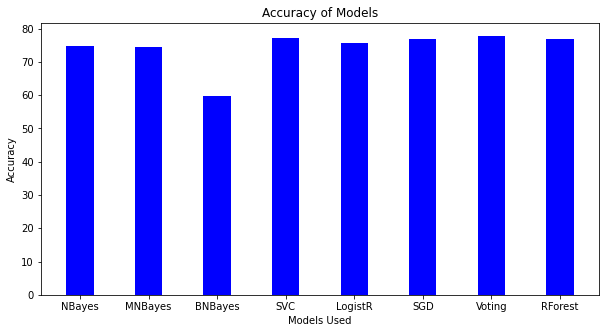

In [12]:
models = ['NBayes', 'MNBayes', 'BNBayes', 'SVC', 'LogistR', 'SGD', 'Voting', 'RForest']
results1 = []
results1.append(nb_acc1)
results1.append(mnb_acc1)
results1.append(bnb_acc1)
results1.append(svc_acc1)
results1.append(lr_acc1)
results1.append(sgd_acc1)
results1.append(vc_acc)
results1.append(ran_acc)

fig = plt.figure(figsize = (10, 5))
plt.bar(models, results1, color ='blue',
        width = 0.4)
 
plt.xlabel("Models Used")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
plt.show()

In [13]:
#Trying with feature extraction to see if results improve

import nltk
import random
from nltk.corpus import CategorizedPlaintextCorpusReader

data_docs = CategorizedPlaintextCorpusReader( root = 'Documents', fileids = r'.+\.txt+', cat_pattern=r'((\w|\.)+)/*', encoding = 'latin1')
data_docs.categories()

#Create labels using folder and randomise
documents = [(list(data_docs.words(fileid)), category)
            for category in data_docs.categories()
            for fileid in data_docs.fileids(category)]
random.shuffle(documents)

In [14]:
%%time

import re
import gensim
from gensim.parsing.porter import PorterStemmer

stemmer = PorterStemmer()
stop_list = gensim.parsing.preprocessing.STOPWORDS

#Data Pre Process
ww = data_docs.words()
w1 = [w.lower() for w in ww]
w2 = [w for w in w1 if re.search('^[a-z]+$',w)]
w3 = [w for w in w2 if w not in stop_list]
w4 = [stemmer.stem(w) for w in w3]

#Using top 3000 words as features 
all_words = nltk.FreqDist(w3)
word_features = list(all_words)[:3000]

#Feature extractor
def document_features(document): 
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features


#Train & Test Split, 70:30
featuresets = [(document_features(d), c) for (d,c) in documents]
train_len = round(len(featuresets) * 0.7)
train_set, test_set = featuresets[:train_len], featuresets[train_len:]

feat_classifier = nltk.NaiveBayesClassifier.train(train_set)
print('Document Catergories: ', feat_classifier.labels())
feat_classifier.show_most_informative_features(20)

Document Catergories:  ['RandomPDFs', 'NDA', 'FinancialReports', 'Endorsements', 'Addendums', 'Payslips']
Most Informative Features
    contains(impairment) = True           Financ : Random =    579.6 : 1.0
   contains(receivables) = True           Financ : Random =    567.6 : 1.0
   contains(commitments) = True           Financ : Random =    543.7 : 1.0
    contains(borrowings) = True           Financ : Random =    484.0 : 1.0
       contains(vesting) = True           Financ : Random =    448.1 : 1.0
     contains(hereunder) = True              NDA : Random =    443.0 : 1.0
     contains(covenants) = True           Financ : Random =    424.2 : 1.0
contains(sustainability) = True           Financ : Random =    424.2 : 1.0
  contains(shareholders) = True           Financ : Random =    340.6 : 1.0
       contains(payable) = True           Financ : Random =    333.4 : 1.0
     contains(financing) = True           Financ : Random =    326.2 : 1.0
       contains(improve) = True           F

In [15]:
#Seeing a sample of the words
print(len(word_features))
print(word_features[0:20])

3000
['cid', 's', 'x', 'n', 'c', 'data', 'b', 'value', 't', 'r', 'e', 'p', 'set', 'd', 'v', 'function', 'k', 'bit', 'number', 'table']


In [16]:
%%time

from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier

print('Test Set Data Accuracy')

classifier2 = nltk.NaiveBayesClassifier.train(train_set)
nb_acc2 = (nltk.classify.accuracy(classifier2, test_set)) * 100
print("NLTK Naive Bayes accuracy:", nb_acc2,'%')

MNB_classifier2 = SklearnClassifier(MultinomialNB())
MNB_classifier2.train(train_set)
mnb_acc2 = (nltk.classify.accuracy(MNB_classifier2, test_set)) * 100
print("MNB_classifier accuracy:", mnb_acc2, '%')

BernoulliNB_classifier2 = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier2.train(train_set)
bnb_acc2 = (nltk.classify.accuracy(BernoulliNB_classifier2, test_set)) * 100
print("BernoulliNB_classifier accuracy:", bnb_acc2, '%')

SVC_classifier2 = SklearnClassifier(SVC())
SVC_classifier2.train(train_set)
svc_acc2 = (nltk.classify.accuracy(SVC_classifier2, test_set)) * 100
print("SVC_classifier accuracy:", svc_acc2, '%')

LogisticRegression_classifier2 = SklearnClassifier(LogisticRegression(max_iter = 450))
LogisticRegression_classifier2.train(train_set)
lr_acc2 = (nltk.classify.accuracy(LogisticRegression_classifier2, test_set)) * 100
print("LogisticRegression_classifier accuracy:", lr_acc2, '%')

SGDClassifier_classifier2 = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier2.train(train_set)
sgd_acc2 = (nltk.classify.accuracy(SGDClassifier_classifier2, test_set)) * 100
print("SGDClassifier_classifier accuracy:", sgd_acc2, '%')

from nltk.classify import ClassifierI
from statistics import mode
import random

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes) 
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

voted_classifier2 = VoteClassifier(classifier2,
                                  SVC_classifier2,
                                  SGDClassifier_classifier2,
                                  MNB_classifier2,
                                  BernoulliNB_classifier2,
                                  LogisticRegression_classifier2)
vc_acc2 = (nltk.classify.accuracy(voted_classifier2, test_set)) * 100
print("Voted_classifier accuracy:", vc_acc2, '%')

RandomForestClassifer_classifier2 = SklearnClassifier(RandomForestClassifier(n_estimators=300, random_state=0))
RandomForestClassifer_classifier2.train(train_set)
ran_acc2 = (nltk.classify.accuracy(RandomForestClassifer_classifier2, test_set)) * 100
print("RandomForest_classifier accuracy:", ran_acc2, '%')

Test Set Data Accuracy
NLTK Naive Bayes accuracy: 79.37853107344633 %
MNB_classifier accuracy: 97.17514124293785 %
BernoulliNB_classifier accuracy: 77.82485875706215 %
SVC_classifier accuracy: 95.33898305084746 %
LogisticRegression_classifier accuracy: 97.45762711864407 %
SGDClassifier_classifier accuracy: 97.45762711864407 %
Voted_classifier accuracy: 96.75141242937853 %
RandomForest_classifier accuracy: 95.62146892655367 %
Wall time: 1min 47s


In [17]:
%%time

#Getting Train_Set Data
print('Train Set Data Accuracy')

nb_acc3 = (nltk.classify.accuracy(classifier2, train_set)) * 100
print("NLTK Naive Bayes accuracy:", nb_acc3,'%')

mnb_acc3 = (nltk.classify.accuracy(MNB_classifier2, train_set)) * 100
print("MNB_classifier accuracy:", mnb_acc3, '%')

bnb_acc3 = (nltk.classify.accuracy(BernoulliNB_classifier2, train_set)) * 100
print("BernoulliNB_classifier accuracy:", bnb_acc3, '%')


svc_acc3 = (nltk.classify.accuracy(SVC_classifier2, train_set)) * 100
print("SVC_classifier accuracy:", svc_acc3, '%')

lr_acc3 = (nltk.classify.accuracy(LogisticRegression_classifier2, train_set)) * 100
print("LogisticRegression_classifier accuracy:", lr_acc3, '%')

sgd_acc3 = (nltk.classify.accuracy(SGDClassifier_classifier2, train_set)) * 100
print("SGDClassifier_classifier accuracy:", sgd_acc3, '%')

voted_classifier2 = VoteClassifier(classifier2,
                                  SVC_classifier2,
                                  SGDClassifier_classifier2,
                                  MNB_classifier2,
                                  BernoulliNB_classifier2,
                                  LogisticRegression_classifier2)
vc_acc3 = (nltk.classify.accuracy(voted_classifier2, train_set)) * 100
print("voted_classifier accuracy:", vc_acc3, '%')

ran_acc3 = (nltk.classify.accuracy(RandomForestClassifer_classifier2, train_set)) * 100
print("RandomForest_classifier accuracy:", ran_acc3, '%')

Train Set Data Accuracy
NLTK Naive Bayes accuracy: 83.22228952150212 %
MNB_classifier accuracy: 97.88007268322228 %
BernoulliNB_classifier accuracy: 81.70805572380375 %
SVC_classifier accuracy: 97.75893397940642 %
LogisticRegression_classifier accuracy: 99.93943064809207 %
SGDClassifier_classifier accuracy: 99.93943064809207 %
voted_classifier accuracy: 99.21259842519686 %
RandomForest_classifier accuracy: 99.93943064809207 %
Wall time: 2min 19s


In [18]:
classifier2.show_most_informative_features(20)

Most Informative Features
    contains(impairment) = True           Financ : Random =    579.6 : 1.0
   contains(receivables) = True           Financ : Random =    567.6 : 1.0
   contains(commitments) = True           Financ : Random =    543.7 : 1.0
    contains(borrowings) = True           Financ : Random =    484.0 : 1.0
       contains(vesting) = True           Financ : Random =    448.1 : 1.0
     contains(hereunder) = True              NDA : Random =    443.0 : 1.0
     contains(covenants) = True           Financ : Random =    424.2 : 1.0
contains(sustainability) = True           Financ : Random =    424.2 : 1.0
  contains(shareholders) = True           Financ : Random =    340.6 : 1.0
       contains(payable) = True           Financ : Random =    333.4 : 1.0
     contains(financing) = True           Financ : Random =    326.2 : 1.0
       contains(improve) = True           Financ : NDA    =    313.1 : 1.0
         contains(lower) = True           Financ : NDA    =    313.1 : 1.0

In [19]:
print("Classification:", voted_classifier2.classify(test_set[0][0]), "Confidence %:",voted_classifier2.confidence(test_set[0][0])*100)
print("Classification:", voted_classifier2.classify(test_set[1][0]), "Confidence %:",voted_classifier2.confidence(test_set[1][0])*100)
print("Classification:", voted_classifier2.classify(test_set[2][0]), "Confidence %:",voted_classifier2.confidence(test_set[2][0])*100)
print("Classification:", voted_classifier2.classify(test_set[3][0]), "Confidence %:",voted_classifier2.confidence(test_set[3][0])*100)
print("Classification:", voted_classifier2.classify(test_set[4][0]), "Confidence %:",voted_classifier2.confidence(test_set[4][0])*100)
print("Classification:", voted_classifier2.classify(test_set[5][0]), "Confidence %:",voted_classifier2.confidence(test_set[5][0])*100)

Classification: RandomPDFs Confidence %: 100.0
Classification: NDA Confidence %: 100.0
Classification: NDA Confidence %: 100.0
Classification: NDA Confidence %: 66.66666666666666
Classification: RandomPDFs Confidence %: 66.66666666666666
Classification: RandomPDFs Confidence %: 66.66666666666666


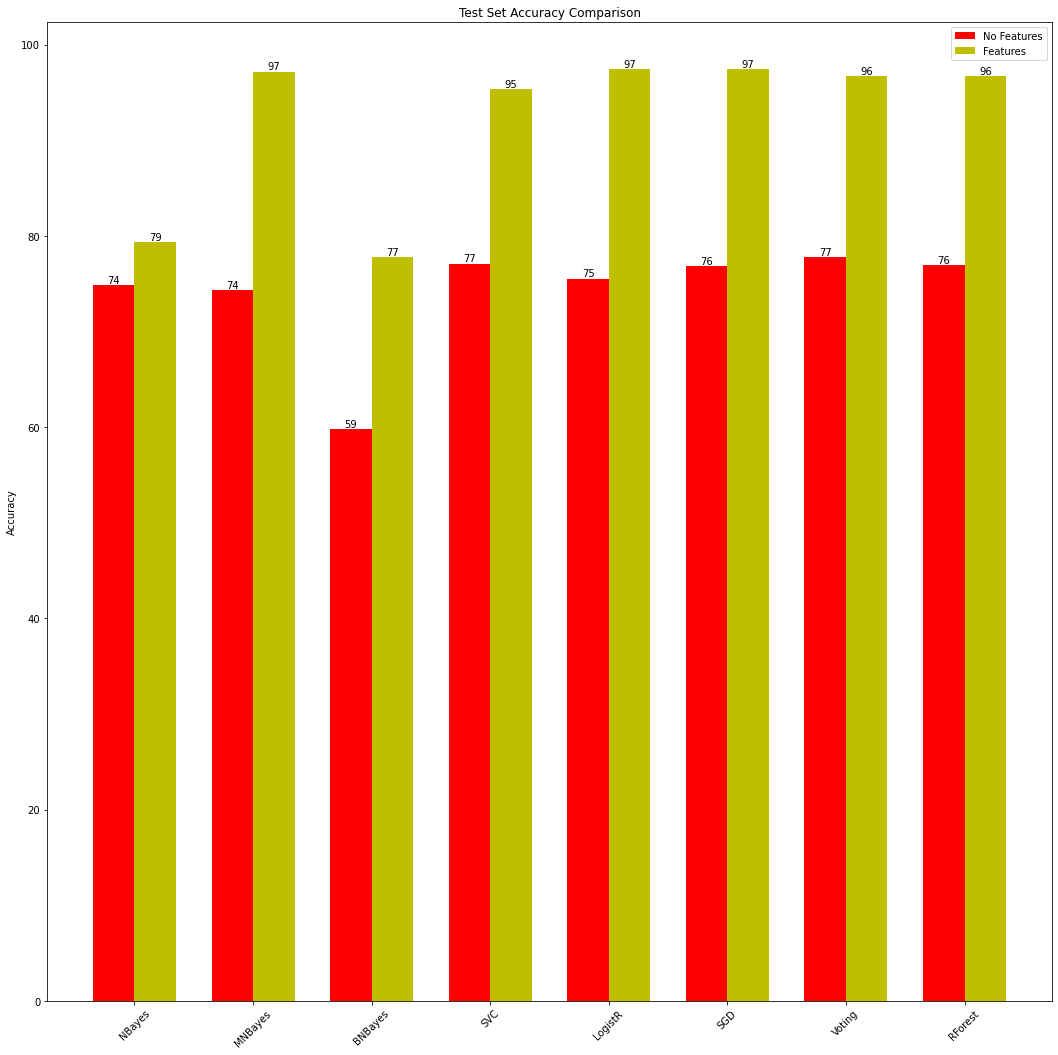

In [20]:
models = ['NBayes', 'MNBayes', 'BNBayes', 'SVC', 'LogistR', 'SGD', 'Voting', 'RForest']
results2 = []
results2.append(nb_acc2)
results2.append(mnb_acc2)
results2.append(bnb_acc2)
results2.append(svc_acc2)
results2.append(lr_acc2)
results2.append(sgd_acc2)
results2.append(vc_acc2)
results2.append(vc_acc2)

import numpy as np
import matplotlib.pyplot as plt

N = len(models)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(18,18))
rects1 = ax.bar(ind, results1, width, color='r')

rects2 = ax.bar(ind + width, results2, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('Test Set Accuracy Comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('NBayes', 'MNBayes', 'BNBayes', 'SVC', 'LogistR', 'SGD', 'Voting', 'RForest'), rotation = 45)

ax.legend((rects1[0], rects2[0]), ('No Features', 'Features'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [21]:
#If we want to dive into the specific numbers of Precision, Recall and F Measure
import collections
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = SGDClassifier_classifier2.classify(feats)
    testsets[observed].add(i)
    
types = ['Addendums', 'Endorsements', 'FinancialReports', 'NDA', 'Payslips', 'RandomPDFs']
    
print('Precision of Addendums:', nltk.precision(refsets['Addendums'], testsets['Addendums']))
print('Recall of Addendums:', nltk.recall(refsets['Addendums'], testsets['Addendums']))
print('F Measure of Addendums:', nltk.f_measure(refsets['Addendums'], testsets['Addendums']))

Precision of Addendums: 0.8333333333333334
Recall of Addendums: 0.875
F Measure of Addendums: 0.853658536585366


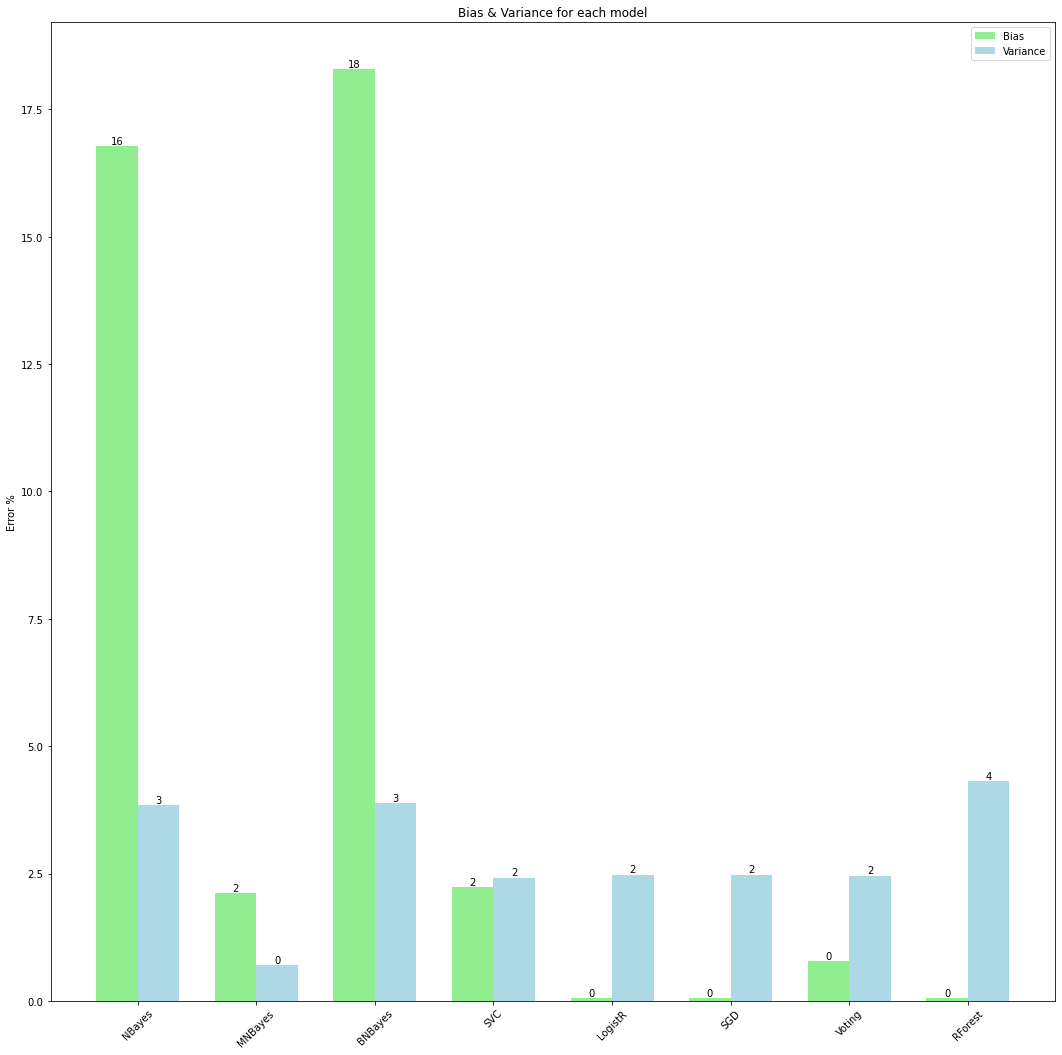

In [22]:
actual = 100
test_acc_results = [nb_acc2, mnb_acc2, bnb_acc2, svc_acc2, lr_acc2, sgd_acc2, vc_acc2, ran_acc2]
train_acc_results = [nb_acc3, mnb_acc3, bnb_acc3, svc_acc3, lr_acc3, sgd_acc3, vc_acc3, ran_acc3]
bias = []
variance = []
#Calcualte Bias by subtracting Train result from 100
for x in train_acc_results:
    x1 = actual - x
    bias.append(x1)
    
#Calcualte Variance    
for x in range(len(test_acc_results)):
    x1 = train_acc_results[x] - test_acc_results[x]
    variance.append(x1)

#Plot the results    
models = ['NBayes', 'MNBayes', 'BNBayes', 'SVC', 'LogistR', 'SGD', 'Voting', 'RForest']    
N = len(models)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(18,18))
rects1 = ax.bar(ind, bias, width, color='lightgreen')

rects2 = ax.bar(ind + width, variance, width, color='lightblue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Error %')
ax.set_title('Bias & Variance for each model')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('NBayes', 'MNBayes', 'BNBayes', 'SVC', 'LogistR', 'SGD', 'Voting', 'RForest'), rotation = 45)

ax.legend((rects1[0], rects2[0]), ('Bias', 'Variance'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [23]:
#All Metrics and Confusion Matrix
test_result = []
gold_result = []

for i in range(len(test_set)):
    test_result.append(voted_classifier2.classify(test_set[i][0]))
    gold_result.append(test_set[i][1])

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix   

con_matrix = confusion_matrix(gold_result, test_result)
print('\nClasification report:\n', classification_report(gold_result, test_result))
print('\nConfussion matrix:\n',con_matrix)


Clasification report:
                   precision    recall  f1-score   support

       Addendums       0.77      0.85      0.81        40
    Endorsements       0.67      0.40      0.50        10
FinancialReports       0.97      0.94      0.95        32
             NDA       0.99      0.98      0.98       203
        Payslips       1.00      0.43      0.60         7
      RandomPDFs       0.98      1.00      0.99       416

        accuracy                           0.97       708
       macro avg       0.90      0.77      0.81       708
    weighted avg       0.97      0.97      0.97       708


Confussion matrix:
 [[ 34   0   1   3   0   2]
 [  5   4   0   0   0   1]
 [  0   0  30   0   0   2]
 [  3   1   0 199   0   0]
 [  2   0   0   0   3   2]
 [  0   1   0   0   0 415]]


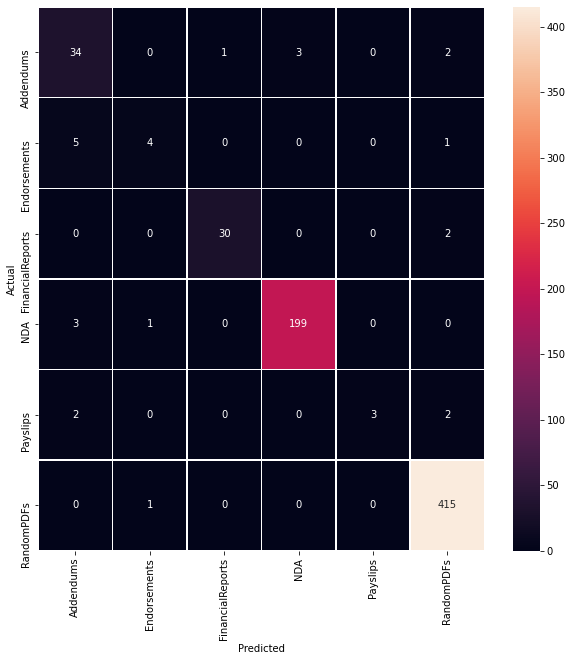

In [24]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(con_matrix, annot=True, fmt='d',
            xticklabels=types, yticklabels=types,
           linewidths=.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
#Convert PDF to Text first. Code to convert is on the second cell from the top.
#Use my langdetect function for consistancy with the trained model to have the best results!

with open('New Add Doc/sample_addendum_0.txt') as f:
    contents = f.read()

#Tokenise the words in text and pre process
tester1=list(gensim.utils.tokenize(contents))
tester2 = [w.lower() for w in tester1]
import re
tester3 = [w for w in tester2 if re.search('^[a-z][a-z]+$',w)]
stop_list = gensim.parsing.preprocessing.STOPWORDS
tester4 = [w for w in tester3 if w not in stop_list]
tester5 = [stemmer.stem(w) for w in tester4]

#Using top 3000 words as features 
tester6 = nltk.FreqDist(tester5)
tester7 = document_features(tester6)
print(contents)

This document is the addendum developed for Harvard FAS faculty in 
  association with the Harvard FAS open access policy of February 12, 
2008. The two paragraphs in italics are optional paragraphs used at the 
  author's discretion. 
 
 
ADDENDUM TO PUBLICATION AGREEMENT 
1.  This Addendum modifies and supplements the attached publication agreement (the 
E
"Publication Agreement") concerning the article titled ______________ (including any 
supplementary materials, the "Work") in ______________. 
2.  The parties to the Publication Agreement as modified and supplemented by this Addendum 
are: ______________  (corresponding author) and any other authors listed on the Work 
(individually or, if more than one author, collectively, "Author") and ______________  
L
("Publisher"). 
3.  The parties agree that wherever there is any conflict between this Addendum and the 
Publication Agreement, the provisions of this Addendum will control and the Publication 
Agreement will be construed accord

In [30]:
print('The Document is classified as:', SGDClassifier_classifier2.classify(tester7))
print('The Document is in fact an Addendum.')

The Document is classified as: Addendums
The Document is in fact an Addendum.


In [39]:
#Work LDA on RandomPDF Folder
import nltk
import re
import gensim

stop_list = nltk.corpus.stopwords.words('english')

def load_corpus(dir):
    # Directory to load Corpus
    corpus = nltk.corpus.PlaintextCorpusReader(dir, '.+\.txt')
    return corpus

def corpus2docs(corpus):
    # Process Corpus words
    fids = corpus.fileids()
    docs1 = []
    for fid in fids:
        doc_raw = corpus.raw(fid)
        doc = nltk.word_tokenize(doc_raw)
        docs1.append(doc)
    docs2 = [[w.lower() for w in doc] for doc in docs1]
    docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
    docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
    return docs4

def docs2vec(docs, dictionary):
    # transform to vectors
    vecs1 = [dictionary.doc2bow(doc) for doc in docs]
    return vecs1

In [40]:
%%time

lda_corpus = load_corpus('./Documents/RandomPDFs')
lda_docs = corpus2docs(lda_corpus)
import gensim
lda_dictionary = gensim.corpora.Dictionary(lda_docs)
lda_vecs = docs2vec(lda_docs, lda_dictionary)

Wall time: 4min 38s


In [101]:
%%time
#Calculate the optimal number of topics to generate
from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 22, 2):
    sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=lda_vecs, id2word=lda_dictionary, num_topics=num_topics)
    coherencemodel = CoherenceModel(model=sg_lda_x, texts=lda_docs, dictionary=lda_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

#Topics: 2 Score: 0.24058178838852576
#Topics: 4 Score: 0.3079053992637583
#Topics: 6 Score: 0.2887398619194272
#Topics: 8 Score: 0.3091639236259141
#Topics: 10 Score: 0.2851615131125447
#Topics: 12 Score: 0.2679814027568849
#Topics: 14 Score: 0.267954692772145
#Topics: 16 Score: 0.2895665087404732
#Topics: 18 Score: 0.28179564731556234
#Topics: 20 Score: 0.28498141561618456
Wall time: 12min 23s


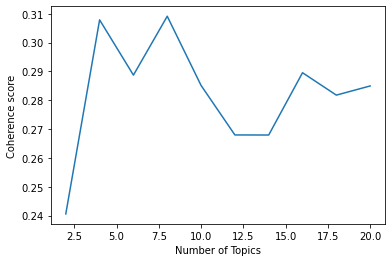

In [102]:
limit=22; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.show()

In [41]:
topic_count = 8
model_lda = gensim.models.ldamodel.LdaModel(corpus=lda_vecs, id2word=lda_dictionary, num_topics=topic_count)
topics = model_lda.show_topics(topic_count, 15)
for i in range(0, 8):
    print(topics[i])

(0, '0.008*"x" + 0.006*"data" + 0.005*"n" + 0.005*"function" + 0.004*"system" + 0.004*"memory" + 0.004*"use" + 0.004*"set" + 0.004*"one" + 0.004*"table" + 0.004*"number" + 0.004*"using" + 0.004*"value" + 0.003*"see" + 0.003*"c"')
(1, '0.015*"cid" + 0.005*"function" + 0.005*"data" + 0.004*"memory" + 0.004*"value" + 0.004*"table" + 0.004*"one" + 0.004*"system" + 0.004*"set" + 0.004*"x" + 0.003*"number" + 0.003*"type" + 0.003*"using" + 0.003*"example" + 0.003*"c"')
(2, '0.015*"x" + 0.008*"n" + 0.006*"b" + 0.005*"number" + 0.005*"data" + 0.005*"c" + 0.004*"set" + 0.004*"r" + 0.004*"v" + 0.004*"p" + 0.004*"example" + 0.004*"u" + 0.004*"k" + 0.004*"f" + 0.004*"page"')
(3, '0.007*"x" + 0.007*"data" + 0.006*"n" + 0.006*"b" + 0.005*"value" + 0.004*"number" + 0.004*"k" + 0.004*"instruction" + 0.004*"set" + 0.004*"c" + 0.004*"type" + 0.004*"example" + 0.003*"function" + 0.003*"memory" + 0.003*"register"')
(4, '0.011*"x" + 0.005*"data" + 0.005*"n" + 0.005*"value" + 0.004*"p" + 0.004*"c" + 0.004*"m

In [42]:
%%time
#Output Results
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()
visual= pyLDAvis.gensim_models.prepare(model_lda, lda_vecs, lda_dictionary)
pyLDAvis.save_html(visual, "RandomPDFs LDA_Topic_Modelling.html")

Wall time: 23.9 s


In [ ]:
#That's all folks! Codes Below are all for testing

In [ ]:
# df = pd.DataFrame(reviews, columns=['filename', 'tag', 'text'])

In [14]:
# import nltk
# import random
# from nltk.corpus import CategorizedPlaintextCorpusReader

# data_docs = CategorizedPlaintextCorpusReader( root = 'Documents', fileids = r'.+\.txt+', cat_pattern=r'((\w|\.)+)/*', encoding = 'latin1')
# data_docs.categories()

# #Create labels using folder and randomise
# documents = [(list(data_docs.words(fileid)), category)
#             for category in data_docs.categories()
#             for fileid in data_docs.fileids(category)]

In [15]:
# print(documents[0])

(['Addendum', 'No', '.', '2', 'Date', ':', 'April', '21', ',', '2009', 'To', ':', 'Prospective', 'Bidders', 'Project', ':', 'UCCS', 'West', 'Lawn', 'Flatwork', '&', 'Grading', ',', 'State', 'Project', '09', '-', '063', 'From', ':', 'Bradley', 'B', '.', 'Bean', ',', 'PE', '419', 'E', '.', 'Columbia', 'Street', 'Colorado', 'Springs', ',', 'CO', '(', '719', ')', '578', '-', '9391', 'This', 'addendum', 'forms', 'a', 'part', 'of', 'the', 'Contract', 'documents', ',', 'and', 'modifies', 'the', 'following', 'as', 'noted', 'below', ':', '1', '.', 'Original', 'Bid', 'documents', 'Dated', 'April', '16', ',', '2009', 'Acknowledge', 'receipt', 'of', 'all', 'addenda', 'in', 'the', 'space', 'provided', 'on', 'the', 'Bid', 'Form', '.', 'ADDENDUM', 'CONTENT', 'CLARIFICATIONS', '1', '.', 'Construction', 'Limit', 'along', 'north', 'edge', 'of', 'parking', 'lot', '-', 'the', 'west', 'lawn', 'project', 'extends', 'to', 'and', 'includes', 'the', 'curb', 'and', 'gutter', 'removal', 'along', 'the', 'north', 

In [16]:
# import pandas as pd
# df = pd.DataFrame(documents, columns=['text', 'label'])

In [17]:
# print(df.head())
# def preprocess(docs):
#     #To lower case all letters
#     docs1 = [w.lower() for w in docs]
#     #Remove punctuation and only keep words
#     docs2 = [w for w in docs1 if re.search('^[a-z]+$',w)]
#     #Remove Stopwords
#     docs3 = [w for w in docs2 if w not in stop_list]
#     #Stemming of words
#     docs4 = [stemmer.stem(w) for w in docs3]
#     return docs4

                                                text      label
0  [Addendum, No, ., 2, Date, :, April, 21, ,, 20...  Addendums
1  [PROMULGATED, BY, THE, TEXAS, REAL, ESTATE, CO...  Addendums
2  [ADDENDUM, NO, ., 1, Charlotte, Douglas, Inter...  Addendums
3  [ADDENDUM, to, the, BbOneâ, ¢, Merchant, Serv...  Addendums
4  [ADDENDUM, NO, ., 2, STANDBY, GENERATOR, AND, ...  Addendums


In [18]:
# import re
# import gensim
# from gensim.parsing.porter import PorterStemmer

# stemmer = PorterStemmer()
# stop_list = gensim.parsing.preprocessing.STOPWORDS

# df['text'] = df['text'].apply(preprocess)

In [19]:
# print(df.head())

                                                text      label
0  [addendum, date, april, prospect, bidder, proj...  Addendums
1  [promulg, texa, real, estat, commiss, trec, ad...  Addendums
2  [addendum, charlott, dougla, intern, airport, ...  Addendums
3  [addendum, merchant, servic, agreement, addend...  Addendums
4  [addendum, standbi, gener, elev, bu, duct, rep...  Addendums


In [39]:
# from gensim.models import Doc2Vec
# from sklearn import utils
# from sklearn.model_selection import train_test_split
# import gensim
# from sklearn.linear_model import LogisticRegression
# from gensim.models.doc2vec import TaggedDocument



# def joiner(t):
#     te = ' '.join(t)
#     return te

# df['text'] = df['text'].apply(joiner)
# print(df.head())

                                                text      label
0  addendum date april prospect bidder project uc...  Addendums
1  promulg texa real estat commiss trec addendum ...  Addendums
2  addendum charlott dougla intern airport furnit...  Addendums
3  addendum merchant servic agreement addendum bb...  Addendums
4  addendum standbi gener elev bu duct replac pro...  Addendums


In [41]:
# import nltk
# from nltk.corpus import stopwords
# def tokenize_text(text):
#     tokens = []
#     for sent in nltk.sent_tokenize(text):
#         for word in nltk.word_tokenize(sent):
#             if len(word) < 2:
#                 continue
#             tokens.append(word.lower())
#     return tokens

# train, test = train_test_split(df, test_size=0.3, random_state=42)

# train_tagged = train.apply(
#     lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.label]), axis=1)
# test_tagged = test.apply(
#     lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.label]), axis=1)

In [42]:
# import multiprocessing
# cores = multiprocessing.cpu_count()
# train_tagged.values[30]


TaggedDocument(words=['ex', 'htm', 'legal', 'opinion', 'confidenti', 'relat', 'parti', 'custom', 'exhibit', 'logo', 'logo', 'deutsch', 'bank', 'aktiengesellschaft', 'taunusanlag', 'frankfurt', 'main', 'feder', 'republ', 'germani', 'deutsch', 'bank', 'aktiengesellschaft', 'ladi', 'gentlemen', 'capac', 'gener', 'counsel', 'germani', 'central', 'eastern', 'europ', 'deputi', 'gener', 'counsel', 'germani', 'central', 'eastern', 'europ', 'respons', 'regulatori', 'matter', 'deutsch', 'bank', 'aktiengesellschaft', 'provid', 'opinion', 'connect', 'annual', 'report', 'compani', 'file', 'secur', 'exchang', 'commiss', 'form', 'respons', 'instruct', 'form', 'familiar', 'annual', 'report', 'form', 'file', 'commiss', 'secur', 'exchang', 'act', 'amend', 'opinion', 'confin', 'matter', 'german', 'law', 'purport', 'expert', 'express', 'opinion', 'concern', 'law', 'law', 'germani', 'form', 'requir', 'thing', 'compani', 'provid', 'annual', 'report', 'form', 'inform', 'certain', 'transact', 'compani', 'cert

In [43]:
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")

# model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
# model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 1651/1651 [00:00<?, ?it/s]


In [44]:
# %%time
# for epoch in range(30):
#     model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
#     model_dbow.alpha -= 0.002
#     model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 1651/1651 [00:00<?, ?it/s]


Wall time: 1min


In [50]:
# def vec_for_learning(model, tagged_docs):
#     sents = tagged_docs.values
#     targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
#     return targets, regressors


In [52]:
# y_train, X_train = vec_for_learning(model_dbow, train_tagged)
# y_test, X_test = vec_for_learning(model_dbow, test_tagged)
# logreg = LogisticRegression(max_iter=450)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# from sklearn.metrics import accuracy_score, f1_score
# print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
# print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.9392655367231638
Testing F1 score: 0.9326973342891297


C:\Users\hipwo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# from nltk.classify.scikitlearn import SklearnClassifier
# from sklearn.naive_bayes import MultinomialNB,BernoulliNB
# from sklearn.linear_model import LogisticRegression,SGDClassifier
# from sklearn.svm import SVC, LinearSVC, NuSVC
# from sklearn.ensemble import RandomForestClassifier

# print('Test Set Data Accuracy')

# MNB = SGDClassifier()
# MNB.fit(X_train, y_train)
# mnd_pred = MNB.predict(X_test)
# print(accuracy_score(y_test, mnd_pred))


Test Set Data Accuracy
0.9124293785310734


In [60]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks
# from imblearn.combine import SMOTETomek
# oversample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# X, y = oversample.fit_resample(X_train, y_train)

In [62]:
# MNB = SVC()
# MNB.fit(X, y)
# mnd_pred = MNB.predict(X_test)
# print(accuracy_score(y_test, mnd_pred))

0.8940677966101694
